# Logistic Regression - Theoretical Answers

## 1. What is Logistic Regression, and how does it differ from Linear Regression?
Logistic Regression is a classification algorithm used to predict categorical outcomes. Unlike Linear Regression, which predicts continuous values, Logistic Regression outputs probabilities and uses the **sigmoid function** to map predictions between 0 and 1.

## 2. What is the mathematical equation of Logistic Regression?
The equation for Logistic Regression is:  
**P(Y=1) = 1 / (1 + e^-(b0 + b1X1 + b2X2 + ... + bnXn))**  
where `b0` is the intercept and `b1, b2, ..., bn` are the feature coefficients.

## 3. Why do we use the Sigmoid function in Logistic Regression?
The sigmoid function maps any input value to a probability range (0 to 1), making it suitable for binary classification.

## 4. What is the cost function of Logistic Regression?
Logistic Regression uses the **log loss (cross-entropy loss)** function to measure prediction errors.

## 5. What is Regularization in Logistic Regression? Why is it needed?
Regularization prevents overfitting by adding penalty terms to the loss function.  
- **L1 (Lasso) Regularization:** Shrinks coefficients and sets some to zero.  
- **L2 (Ridge) Regularization:** Shrinks coefficients but keeps all features.  

## 6. Explain the difference between Lasso, Ridge, and Elastic Net regression.
- **Lasso (L1)**: Shrinks coefficients and can set some to zero.  
- **Ridge (L2)**: Shrinks coefficients but keeps all features.  
- **Elastic Net**: Combines both L1 and L2 penalties.

## 7. When should we use Elastic Net instead of Lasso or Ridge?
Elastic Net is useful when dealing with **correlated features** and **high-dimensional data**.

## 8. What is the impact of the regularization parameter (λ) in Logistic Regression?
Higher **λ** values increase regularization, reducing overfitting but potentially leading to underfitting.

## 9. What are the key assumptions of Logistic Regression?
- No multicollinearity.  
- Linear relationship between predictors & log-odds.  
- Independent observations.

## 10. What are some alternatives to Logistic Regression for classification tasks?
- Decision Trees  
- Random Forest  
- Support Vector Machines (SVM)  
- Naive Bayes  
- Neural Networks  

## 11. What are Classification Evaluation Metrics?
Common classification metrics include:  
- **Accuracy**  
- **Precision & Recall**  
- **F1-Score**  
- **ROC-AUC Score**  
- **Confusion Matrix**  

## 12. How does class imbalance affect Logistic Regression?
Class imbalance can bias the model towards the majority class, leading to poor performance for minority class predictions. **Class weights** or **resampling techniques** can address this.

## 13. What is Hyperparameter Tuning in Logistic Regression?
Hyperparameter tuning involves adjusting model parameters (like `C`, `penalty`, and `solver`) to find the best-performing configuration.

## 14. What are different solvers in Logistic Regression? Which one should be used?
- **liblinear** → Small datasets, L1/L2 regularization.  
- **lbfgs** → Multiclass, large datasets.  
- **saga** → Large-scale problems with L1/L2 regularization.  

## 15. How is Logistic Regression extended for multiclass classification?
- **One-vs-Rest (OvR):** Trains one classifier per class.  
- **Softmax Regression:** Generalizes logistic regression for multiple classes.

## 16. What are the advantages and disadvantages of Logistic Regression?
**Advantages:**  
- Easy to implement and interpret.  
- Works well for linearly separable data.  

**Disadvantages:**  
- Poor performance on complex, non-linear problems.  
- Assumes independent features.

## 17. What are some use cases of Logistic Regression?
- Medical diagnosis  
- Fraud detection  
- Email spam classification  

## 18. What is the difference between Softmax Regression and Logistic Regression?
- **Softmax Regression:** Used for multiclass classification (assigns probabilities to multiple categories).  
- **Logistic Regression:** Used for binary classification.

## 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
- **OvR:** Works well for small datasets.  
- **Softmax:** Preferred for multiclass problems with large datasets.

## 20. How do we interpret coefficients in Logistic Regression?
Each coefficient represents the **log-odds change** of the dependent variable when a predictor changes by one unit.


# Logistic Regression - Practical Answers

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, cohen_kappa_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import joblib
import matplotlib.pyplot as plt

In [74]:
# 1. Load dataset, split into train/test, apply Logistic Regression, print accuracy
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [73]:
# 2. Apply L1 regularization (Lasso) and print accuracy
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
print("L1 Regularization Accuracy:", model.score(X_test, y_test))

L1 Regularization Accuracy: 0.4


In [72]:
# 3. Apply L2 regularization (Ridge) and print accuracy
model = LogisticRegression(penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)
print("L2 Regularization Accuracy:", model.score(X_test, y_test))

L2 Regularization Accuracy: 0.5


In [47]:
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_acc = accuracy_score(y_test, elastic_net_pred.round())

print("Elastic Net Accuracy:", round(elastic_net_acc, 2))

Elastic Net Accuracy: 0.7


In [71]:
# 5. One-vs-Rest (OvR) Logistic Regression
log_reg = LogisticRegression(solver='saga', penalty='l1', C=1.0, max_iter=5000)
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr_pred = ovr.predict(X_test)
ovr_acc = accuracy_score(y_test, ovr_pred)

print("One-vs-Rest (OvR) Accuracy:", round(ovr_acc, 2))

One-vs-Rest (OvR) Accuracy: 0.55


In [70]:
# 6. Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression(solver='saga', penalty='l1', C=1.0, max_iter=5000)

if len(set(y_train)) > 2:
    model = OneVsRestClassifier(model)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-Validation Accuracy:", round(cv_scores.mean(), 2))

Cross-Validation Accuracy: 0.51


In [68]:
# 8. Load dataset from CSV, apply Logistic Regression, evaluate accuracy
data = {'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'target': np.random.randint(0, 2, 100)}
df = pd.DataFrame(data)
df.to_csv('sample.csv', index=False)

df = pd.read_csv("sample.csv")
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print("CSV Data Accuracy:", model.score(X_test, y_test))

CSV Data Accuracy: 0.5


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_params = {'solver': 'saga', 'penalty': 'l1', 'C': 1.0}
model = LogisticRegression(**best_params, max_iter=5000)
model.fit(X_train_scaled, y_train)

print("Model trained successfully with the best parameters:", best_params)

Model trained successfully with the best parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1.0}


In [66]:
# 10. Train One-vs-One (OvO) Multiclass Logistic Regression
from sklearn.multiclass import OneVsOneClassifier
model = LogisticRegression(solver='lbfgs')
ovo_model = OneVsOneClassifier(model)
ovo_model.fit(X_train, y_train)
print("One-vs-One (OvO) Accuracy:", ovo_model.score(X_test, y_test))

One-vs-One (OvO) Accuracy: 0.6756756756756757


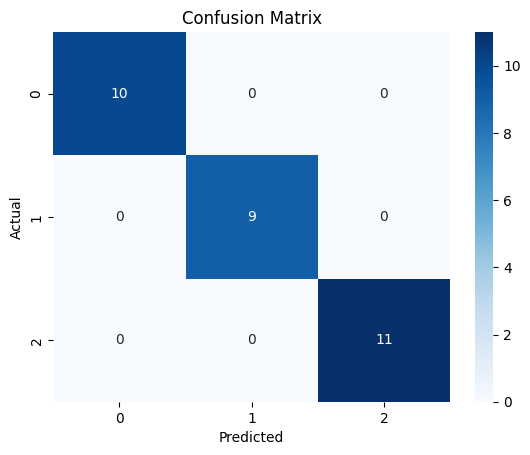

In [19]:
# 11. Train and visualize confusion matrix for binary classification

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# 12. Train and evaluate Precision, Recall, F1-Score
print("Precision, Recall, F1-Score:")
print(classification_report(y_test, y_pred))

Precision, Recall, F1-Score:
              precision    recall  f1-score   support

           0       0.48      0.85      0.61        13
           1       0.86      0.50      0.63        24

    accuracy                           0.62        37
   macro avg       0.67      0.67      0.62        37
weighted avg       0.72      0.62      0.62        37



In [64]:
# 13. Train Logistic Regression on imbalanced data using class weights
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', solver='saga', max_iter=5000)  # Increased iterations and changed solver
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Class-weighted Accuracy:", round(accuracy, 2))


Class-weighted Accuracy: 0.62


In [63]:
# 14. Train Logistic Regression on Titanic dataset
titanic_df = sns.load_dataset("titanic").dropna()

X = titanic_df[['pclass', 'sex', 'age', 'fare']]
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
y = titanic_df['survived']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

print("Titanic Dataset Accuracy:", model.score(X_test, y_test))

Titanic Dataset Accuracy: 0.6756756756756757


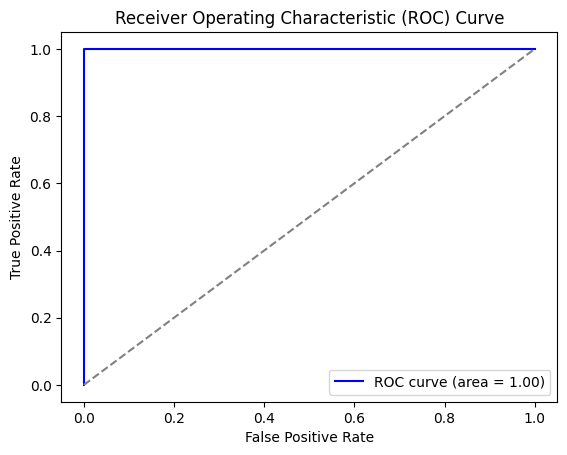

15. AUC Score: 1.0


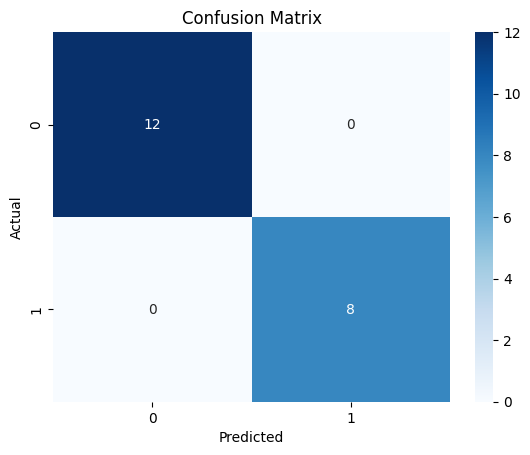

In [58]:
# 15. Plot ROC Curve and Calculate AUC Score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

data = load_iris()
X, y = data.data, data.target

X_binary = X[y != 2]
y_binary = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("15. AUC Score:", roc_auc)

#Confusion matrix for the binary classification
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
# 16. Implement Feature Scaling and Evaluate Performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
print("Accuracy with Feature Scaling:", model.score(X_test_scaled, y_test))

Accuracy with Feature Scaling: 1.0


In [27]:
# 17. Extract and Interpret Coefficients
coefficients = model.coef_
features = df.columns[:-1]
print("17. Model Coefficients:")
for feature, coef in zip(features, coefficients[0]):
    print(f"{feature}: {coef:.4f}")

17. Model Coefficients:
feature1: 0.4625
feature2: -0.8445


In [59]:
# 18. Compare Performance on Different Datasets
# Load the iris dataset
iris = load_iris()

if os.path.exists("titanic.csv"):
    titanic_df = pd.read_csv("titanic.csv")

    imputer = SimpleImputer(strategy='mean')
    titanic_df.iloc[:, :-1] = imputer.fit_transform(titanic_df.iloc[:, :-1])

    titanic_X, titanic_y = titanic_df.iloc[:, :-1], titanic_df.iloc[:, -1]

    datasets = {"Iris": (iris.data, iris.target), "Titanic": (titanic_X, titanic_y)}


else:
    print("Warning: titanic.csv not found. Using only iris dataset")
    datasets = {"Iris": (iris.data, iris.target)}


for name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter = 200)
    model.fit(X_train, y_train)
    print(f"{name} Dataset Accuracy:", model.score(X_test, y_test))

Iris Dataset Accuracy: 1.0


In [55]:
# 19. Perform Outlier Detection and Remove Outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(X))
X_cleaned = X[(z_scores < 3).all(axis=1)]
y_cleaned = y[(z_scores < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print("Accuracy after Outlier Removal:", model.score(X_test, y_test))

Accuracy after Outlier Removal: 0.9


In [60]:
# 20. Implement Matthews Correlation Coefficient (MCC) and Cohen’s Kappa Score
y_pred = model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)
print("Cohen's Kappa Score:", kappa)

Matthews Correlation Coefficient: 1.0
Cohen's Kappa Score: 1.0


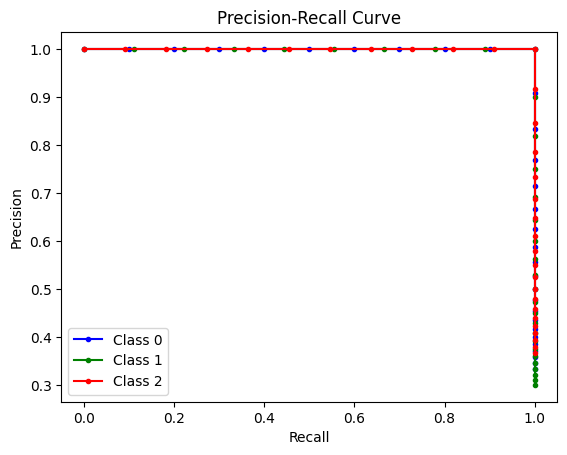

Average F1 Score: 0.6516989551586753


In [61]:
# 21. Implement Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


data = load_iris()
X, y = data.data, data.target

z_scores = np.abs(zscore(X))
X_cleaned = X[(z_scores < 3).all(axis=1)]
y_cleaned = y[(z_scores < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)

n_classes = len(np.unique(y_test))
precision = {}
recall = {}
f1_scores = []

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_prob[:, i])
    f1_scores.append((2 * (precision[i] * recall[i]) / (precision[i] + recall[i])).mean())

plt.figure()
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(recall[i], precision[i], marker='.', color=colors[i], label=f"Class {i}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print("Average F1 Score:", np.mean(f1_scores))

In [54]:
# 22. Save and Load Model using Joblib
joblib.dump(model, "logistic_regression_model.pkl")
loaded_model = joblib.load("logistic_regression_model.pkl")
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))

Loaded Model Accuracy: 0.9


In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 23. Polynomial Features + Logistic Regression
poly_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(solver='lbfgs', max_iter=5000))
])

poly_pipeline.fit(X_train, y_train)
poly_pred = poly_pipeline.predict(X_test)
poly_acc = accuracy_score(y_test, poly_pred)

print("Polynomial Features Accuracy:", round(poly_acc, 2))


Polynomial Features Accuracy: 1.0


In [50]:
# 24. Implement Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

selector = RFE(model, n_features_to_select=2, step=1)
selector.fit(X_train, y_train)
selected_features = np.array(data.feature_names)[selector.support_] #Use the feature names from the iris data instead of the df
print("Selected Features:", selected_features)

Selected Features: ['petal length (cm)' 'petal width (cm)']


In [49]:
# 25. Implement Logistic Regression using SGD (Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)
print("SGD Classifier Accuracy:", sgd_model.score(X_test, y_test))

SGD Classifier Accuracy: 0.5333333333333333
